# 用户指南，用户指南，第6章：流(II)：分层，递归与扁平化
[原文链接](https://web.mit.edu/music21/doc/usersGuide/usersGuide_06_stream2.html#usersguide-06-stream2)

[第4章](4.ipynb)我们创建了一个嵌套的`Stream`对象。先把它重新创建出来

In [1]:
from music21 import *

note1 = note.Note("C4")
note1.duration.type = 'half'
note2 = note.Note("F#4")
note3 = note.Note("B-2")

stream1 = stream.Stream()
stream1.id = 'some notes'
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)

biggerStream = stream.Stream()
note2 = note.Note("D#5")
biggerStream.insert(0, note2)
biggerStream.append(stream1)

到目前为止，我们介绍过的唯一的显示内层`Stream`内容的方法，是用`.show('text')`

In [2]:
biggerStream.show('text')

{0.0} <music21.note.Note D#>
{1.0} <music21.stream.Stream some notes>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note F#>
    {3.0} <music21.note.Note B->


In [3]:
note

<module 'music21.note' from 'E:\\Python39\\lib\\site-packages\\music21\\note.py'>

In [4]:
print(note.Note)

<class 'music21.note.Note'>


In [5]:
n=note.Note()
n

<music21.note.Note C>

In [6]:
d=note.Note('D#5')
d

<music21.note.Note D#>

In [7]:
help(note.Note)

Help on class Note in module music21.note:

class Note(NotRest)
 |  Note(pitchName=None, **keywords)
 |  
 |  One of the most important music21 classes, a Note
 |  stores a single note (that is, not a rest or an unpitched element)
 |  that can be represented by one or more notational units -- so
 |  for instance a C quarter-note and a D# eighth-tied-to-32nd are both
 |  a single Note object.
 |  
 |  
 |  A Note knows both its total duration and how to express itself as a set of
 |  tied notes of different lengths. For instance, a note of 2.5 quarters in
 |  length could be half tied to eighth or dotted quarter tied to quarter.
 |  
 |  
 |  The first argument to the Note is the pitch name (with or without
 |  octave, see the introduction to :class:`music21.pitch.Pitch`).
 |  Further arguments can be specified as keywords (such as type, dots, etc.)
 |  and are passed to the underlying :class:`music21.duration.Duration` element.
 |  
 |  >>> n = note.Note()
 |  >>> n
 |  <music21.note.N

In [8]:
nr = note.NotRest()
n = note.Note()
print(nr.beams, n.beams)

<music21.beam.Beams> <music21.beam.Beams>


In [9]:
r = note.Rest()
r.beams

AttributeError: 'Rest' object has no attribute 'beams'

In [10]:
print(nr.pitch)

AttributeError: 'NotRest' object has no attribute 'pitch'

In [11]:
class Japan:
    food = "sushi"
    drink = "sake"

class Okinawa(Japan):
    evenBetterFood = "spam potstickers"

In [12]:
o = Okinawa()
print(o.food, o.drink, o.evenBetterFood)

sushi sake spam potstickers


In [13]:
j = Japan()
print(j.evenBetterFood)

AttributeError: 'Japan' object has no attribute 'evenBetterFood'

In [14]:
sBach = corpus.parse('bach/bwv57.8')

In [15]:
len(sBach)

9

In [16]:
len(sBach[3])

14

In [17]:
len(sBach[3][1])

7

In [18]:
len(sBach.getElementsByClass(stream.Part))

4

In [19]:
len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))

13

In [20]:
len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(
        stream.Measure)[1].getElementsByClass(note.Note))

3

In [21]:
len(sBach.getElementsByClass('Part'))

4

In [22]:
len(sBach.parts)

4

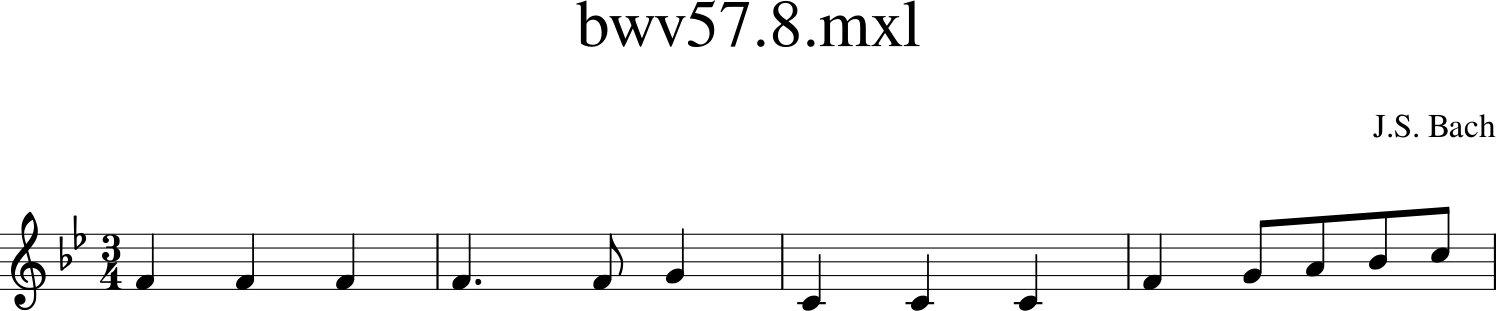

In [23]:
alto = sBach.parts[1]  # parts count from zero, so soprano is 0 and alto is 1
excerpt = alto.measures(1, 4)
excerpt.show()

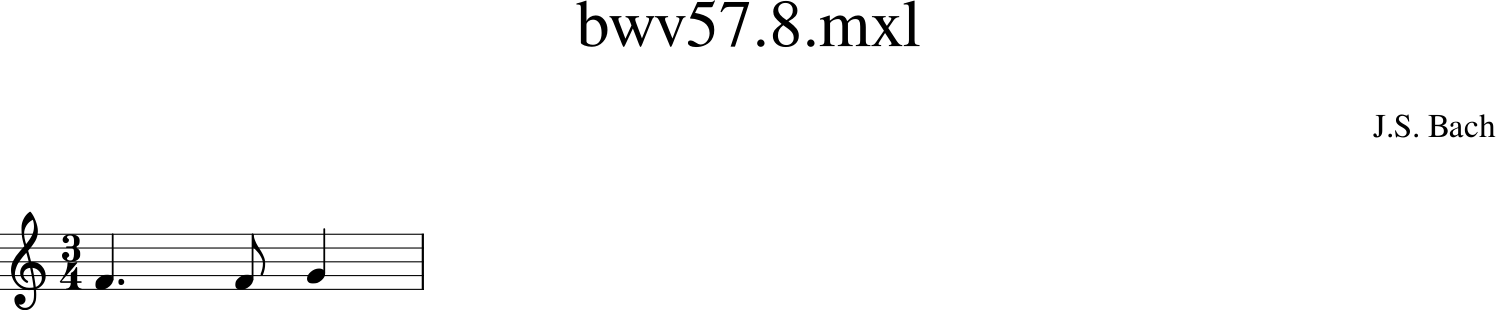

In [24]:
measure2 = alto.measure(2)  # measure not measure_s_
measure2.show()

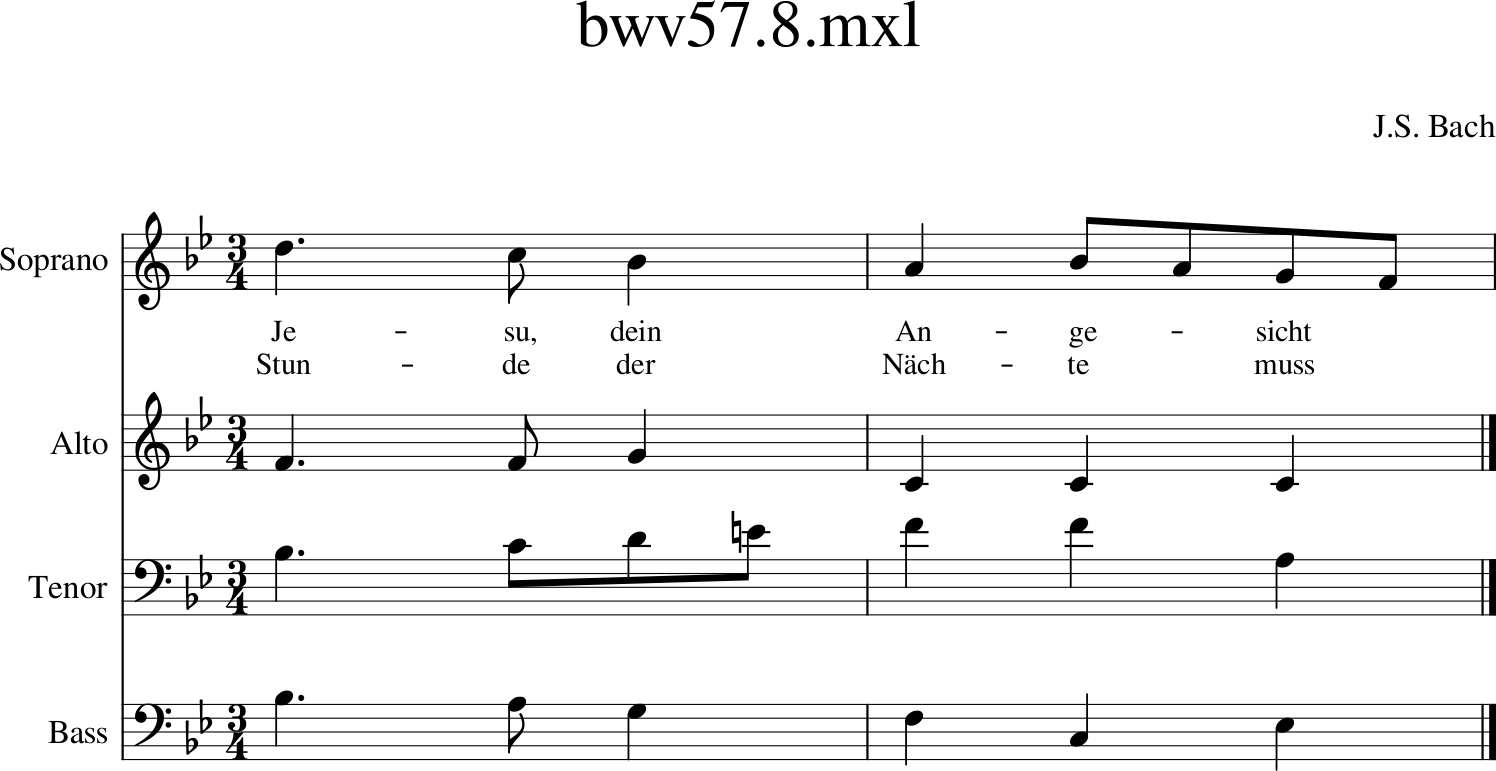

In [25]:
measureStack = sBach.measures(2, 3)
measureStack.show()

In [26]:
s = stream.Score(id='mainScore')
p0 = stream.Part(id='part0')
p1 = stream.Part(id='part1')

m01 = stream.Measure(number=1)
m01.append(note.Note('C', type="whole"))
m02 = stream.Measure(number=2)
m02.append(note.Note('D', type="whole"))
p0.append([m01, m02])

m11 = stream.Measure(number=1)
m11.append(note.Note('E', type="whole"))
m12 = stream.Measure(number=2)
m12.append(note.Note('F', type="whole"))
p1.append([m11, m12])

s.insert(0, p0)
s.insert(0, p1)
s.show('text')

{0.0} <music21.stream.Part part0>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note C>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note D>
{0.0} <music21.stream.Part part1>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note E>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note F>


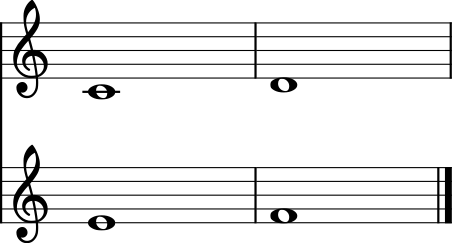

In [27]:
s.show()

In [28]:
recurseScore = s.recurse()
recurseScore

<music21.stream.iterator.RecursiveIterator for Score:mainScore @:0>

In [29]:
for el in s.recurse():
    print(el.offset, el, el.activeSite)

0.0 <music21.stream.Part part0> <music21.stream.Score mainScore>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part0>
0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part0>
0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.stream.Part part1> <music21.stream.Score mainScore>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part1>
0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part1>
0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>


In [30]:
for el in s.recurse().notes:
    print(el.offset, el, el.activeSite)

0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>


In [31]:
for el in s.flatten():
    print(el.offset, el, el.activeSite)

0.0 <music21.note.Note C> <music21.stream.Score mainScore_flat>
0.0 <music21.note.Note E> <music21.stream.Score mainScore_flat>
4.0 <music21.note.Note D> <music21.stream.Score mainScore_flat>
4.0 <music21.note.Note F> <music21.stream.Score mainScore_flat>


In [32]:
len(sBach.getElementsByClass(note.Note))

0

In [33]:
len(sBach.flatten().getElementsByClass(note.Note))

150

In [34]:
m = sBach.parts[0].getElementsByClass('Measure')[7]
m.getOffsetBySite(sBach.parts[0])

21.0

In [35]:
n = sBach.parts[0].measure(8).notes[1]
n

<music21.note.Note E->

In [36]:
n.getOffsetBySite(m)

1.0

In [37]:
pFlat = sBach.parts[0].flatten()
indexN = pFlat.index(n)
pFlat[indexN]

<music21.note.Note E->

In [38]:
pFlat[indexN].offset

22.0